In [1]:
import networkx as nx
from typing import Any

from plotly import graph_objects as go

In [2]:

colors = {
    "total": "RGBA(0,120,156,1)", # #00789c Blue
    "cancer": "RGBA(209,73,91,1)", # #d1495b Red
    "telederm": "RGBA(142,65,186,1)", # #8e41ba Purple
    "intermediate_service": "rgba(102,161,130,1)", # #66a182 Green
}
transparent_colors = {k:v[:-2]+"0.5)" for k,v in colors.items()}

# South Somerset                    - 2WW: 12% / Teledermatology: 40%
# Sedgemoor                         - 2WW: 60% / Teledermatology: 88%
# Somerset West and Taunton         - 2WW: 11% / Teledermatology: 89%
# Mendip                            - 2WW: 44% / Teledermatology: 56%

# Somerset Total                    - 2WW: 42% / Teledermatology: 58%
# Overall Total                     - 2WW: 43% / Teledermatology: 57%


edges = [
    ("Total Referrals", "2WW Cancer", {"color": transparent_colors["total"], "weight": 43}), # manually changed this figure for Area
    ("Total Referrals", "Teledermatology", {"color": transparent_colors["total"], "weight": 57}), # manually changed this figure for Area

    ("2WW Cancer", "Reviewed by AI", {"color": transparent_colors["cancer"], "weight": 85}),
    ("2WW Cancer", "Reviewed by Consultant", {"color": transparent_colors["cancer"], "weight": 15}),

    ("Reviewed by AI", "Face to Face", {"color": transparent_colors["cancer"], "weight": 65}),
    ("Reviewed by AI", "Discharged", {"color": transparent_colors["cancer"], "weight": 35}),

    ("Face to Face","Discharged",  {"color": transparent_colors["cancer"], "weight": 100}),

    ("Reviewed by Consultant", "Face to Face", {"color": transparent_colors["cancer"], "weight": 65}),
    ("Reviewed by Consultant", "Discharged", {"color": transparent_colors["cancer"], "weight": 35}),

    ("Face to Face","Discharged",  {"color": transparent_colors["cancer"], "weight": 100}), 

    ("Teledermatology", "2WW Cancer", {"color": transparent_colors["cancer"], "weight": 10}), 
    ("Teledermatology", "A&G", {"color": transparent_colors["telederm"], "weight": 50}),
    ("Teledermatology", "Specialist Referral", {"color": transparent_colors["cancer"], "weight": 5}),
    ("Teledermatology", "Intermediate Service", {"color": transparent_colors["telederm"], "weight": 35}),

    ("A&G", "Discharged", {"color": transparent_colors["telederm"], "weight": 100}),    

    ("Intermediate Service", "Face to Face", {"color": transparent_colors["intermediate_service"], "weight": 63}),
    ("Intermediate Service", "Telephone Appt", {"color": transparent_colors["intermediate_service"], "weight": 37}),

    ("Face to Face", "Discharged", {"color": transparent_colors["intermediate_service"], "weight": 73}),
    ("Face to Face", "Follow-up", {"color": transparent_colors["intermediate_service"], "weight": 4}),
    ("Face to Face", "Minor Surgery", {"color": transparent_colors["intermediate_service"], "weight": 11}),
    ("Face to Face", "Specialist Referral", {"color": transparent_colors["cancer"], "weight": 12}),

    ("Minor Surgery", "Discharged", {"color": transparent_colors["intermediate_service"], "weight": 98}),
    ("Minor Surgery", "Follow-up", {"color": transparent_colors["intermediate_service"], "weight": 2}),

    ("Follow-up", "Discharged", {"color": transparent_colors["intermediate_service"], "weight": 100}),

    ("Specialist Referral", "Max Fax & Plastics", {"color": transparent_colors["cancer"], "weight": 84}),
    ("Specialist Referral", "Dermatology", {"color": transparent_colors["cancer"], "weight": 16}),

    ("Max Fax & Plastics", "Discharged", {"color": transparent_colors["cancer"], "weight": 100}),

    ("Dermatology", "Discharged", {"color": transparent_colors["cancer"], "weight": 100}),

    ("Telephone Appt", "Minor Surgery", {"color": transparent_colors["intermediate_service"], "weight": 75}),
    ("Telephone Appt", "Phototherapy", {"color": transparent_colors["intermediate_service"], "weight": 20}),
    ("Telephone Appt", "Other", {"color": transparent_colors["intermediate_service"], "weight": 5}),

    ("Minor Surgery", "Discharged", {"color": transparent_colors["intermediate_service"], "weight": 98}),
    ("Minor Surgery", "Follow-up", {"color": transparent_colors["intermediate_service"], "weight": 2}),

    ("Follow-up", "Discharged", {"color": transparent_colors["intermediate_service"], "weight": 100}),

    ("Phototherapy", "Discharged", {"color": transparent_colors["intermediate_service"], "weight": 100}),

    ("Other", "Discharged", {"color": transparent_colors["intermediate_service"], "weight": 100}),

]

nodes = [
    ("Total Referrals", {"color": colors["total"]}),
    ("2WW Cancer", {"color": colors["cancer"]}),
    ("Face to Face", {"color": colors["intermediate_service"]}),
    ("Teledermatology", {"color": colors["telederm"]}),
    ("A&G", {"color": colors["telederm"]}),
    ("Specialist Referral", {"color": colors["cancer"]}),
    ("Intermediate Service", {"color": colors["intermediate_service"]}),
    ("Discharged", {"color": colors["intermediate_service"]}),
    ("Follow-up", {"color": colors["intermediate_service"]}),
    ("Minor Surgery", {"color": colors["intermediate_service"]}),
    ("Max Fax & Plastics", {"color": colors["intermediate_service"]}),
    ("Dermatology", {"color": colors["intermediate_service"]}),
    ("Telephone Appt", {"color": colors["intermediate_service"]}),
    ("Phototherapy", {"color": colors["intermediate_service"]}),
    ("Other", {"color": colors["intermediate_service"]}),
    ("Reviewed by Consultant", {"color": colors["cancer"]}),
    ("Reviewed by AI", {"color": colors["cancer"]}),    

    
]

G = nx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(nodes)

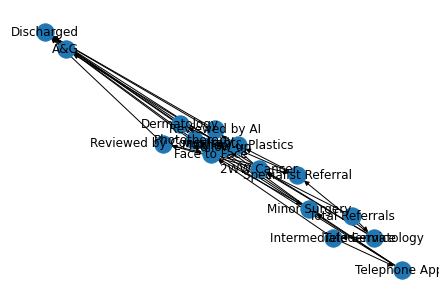

In [3]:
nx.draw(G, with_labels=True)

In [4]:
# start with parent node
#  multiply number by weight for each descendent edge
#  set node attribute to be number
#  continue until all descendents have been allocated

def calculate_graph_values(G: nx.DiGraph, parent_node: Any, value: float) -> None:
    """
    Recursively calculates and updates the values of nodes in a weighted directed graph.

    Parameters:
    - G (nx.DiGraph): The weighted directed graph.
    - parent_node (Any): The current parent node for which the values are being calculated.
    - value (float): The initial value to be assigned to the parent node.

    Returns:
    None

    This function traverses the graph recursively, updating the "value" attribute of each node based on
    the weighted distribution of values to its children. The weights of edges from the parent node to its
    children should add up to 100. The calculation is performed in a depth-first manner.
    """
    children = G[parent_node]
    G.nodes[parent_node]["value"] = G.nodes[parent_node].get("value", 0) + value

    if not children:
        pass
    else:
        # check weights add to 100
        assert sum([G.edges[(parent_node, child)]["weight"] for child in G[parent_node]]) == 100, \
        f"Weights do not add up to 100% for the children of {parent_node}"

        for child in children:
            w = G.edges[(parent_node, child)]["weight"]
            new_val = value * (w/100)

            G.edges[(parent_node, child)]["value"] = G.edges[(parent_node, child)].get("value", 0) + new_val

            calculate_graph_values(G, child, new_val)

    return

In [5]:
def generate_sankey(G: nx.Graph) -> None:
    """
    Generate a Sankey diagram for the given graph.

    Parameters:
    - G (nx.Graph): The input graph.

    Returns:
    - None

    This function takes a NetworkX graph (G) as input and generates a Sankey diagram to visualize the flow of values
    within the graph. It creates a Sankey diagram using Plotly's Sankey implementation.

    The Sankey diagram displays nodes and directed links representing flows of values. Nodes represent the entities
    in the graph, and links represent the connections or flow between them. The width of the links corresponds to
    the magnitude of the flow between nodes.
    """
    sources, targets = [*zip(*G.edges)]
    nodes = list(G.nodes)

    get_node_indices = lambda node_list : [idx for node in node_list for idx, val in enumerate(nodes) if val == node]

    fig = go.Figure(data=[go.Sankey(
        node = dict(
        pad = 15,
        thickness = 10,
        line = dict(color = "black", width = 0.5),
        label = [f"{node} {int(round(val, 0))}" for node, val in nx.get_node_attributes(G, "value").items()],
        color = list(nx.get_node_attributes(G, "color").values())
        ),
        link = dict(
        source = get_node_indices(sources), 
        target = get_node_indices(targets),
        value = list(nx.get_edge_attributes(G_south_somerset, "value").values()),
        color = list(nx.get_edge_attributes(G, "color").values())
    ))])

    fig.update_layout(title_text="Somerset Dermatology Totals")
    fig.show()

In [6]:
G_south_somerset = G.copy()
calculate_graph_values(G_south_somerset, parent_node="Total Referrals", value=18989)
generate_sankey(G_south_somerset)